# Data Representation 


In [16]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers
from keras.utils import to_categorical

In [19]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

### Tensors are the basic data structure for deep learning
#### Scalar- 0D Tensor
#### Vector- 1D Tensor
#### Matrix- 2D Tensor
#### Array- 3D or higher-dimnesional Tensors


#### The number of axes of the tensor is called *rank*
#### Dimensionality can denote either the number of entries along a specific axis (as in the case of a 5D vector) or the number of axes in a tensor

### Scalars- 
   #### A tensor that contains only 1 number


In [6]:
x=np.array(12)

In [7]:
x

array(12)

In [9]:
x.ndim

0

### Vectors-
#### An array of numbers is called vector. A vector that has 4 entries is called a 4D vector but it is not a 4D Tensor. It has only one axis but 5 dimensions along the axis



In [10]:
x= np.array([12,4,5,7,8])

In [11]:
x

array([12,  4,  5,  7,  8])

In [12]:
x.ndim

1

### Matrices-

#### An array of vector is called matrix or 2D Tensor. The 2 axes are *rows* and *columns*. The entirs from the first axis are called *rows* and the entries from the second axis are called *columns*


In [14]:
x= np.array([[1,2,3,4,5],[76,7887,947,4,6],[45,2,6,3,8]])

In [15]:
x

array([[   1,    2,    3,    4,    5],
       [  76, 7887,  947,    4,    6],
       [  45,    2,    6,    3,    8]])

In [16]:
x.ndim

2

### 3DTensors-
#### Multiple matrires pakced in an array is called 3D Tensor

In [21]:
x=np.array([[
    [1,2,3,4,5],
    [234,6,7,8,6]],
    [[1,2,3,4,5],
     [1,2,3,4,5]]])

In [22]:
x

array([[[  1,   2,   3,   4,   5],
        [234,   6,   7,   8,   6]],

       [[  1,   2,   3,   4,   5],
        [  1,   2,   3,   4,   5]]])

In [23]:
x.ndim

3

### Key Attributes:
A tensor is defined by 3 attributes-
 - Rank (number of axes): 
 - Shape
 - Data type 

In [24]:
train_images.ndim

3

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images.dtype

dtype('uint8')

In [29]:
digit= train_images[5]

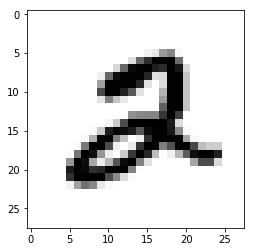

In [35]:
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

### Manipulate Tensors using Numpy

Selecting a specific element in a tensor is called ***Tensor Slicing***

In [37]:
tensor_slice=train_images[10:100]

In [38]:
tensor_slice.shape

(90, 28, 28)

In [39]:
tensor_slice=train_images[10:100,:,:]

In [40]:
tensor_slice=train_images[10:100,0:28, 0:28]

In [44]:
tensor_slice.shape

(90, 28, 28)

In [45]:
tensor_slice= train_images[10:100, 10:24,10:24]

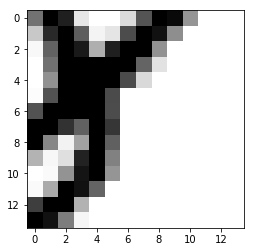

In [49]:
plt.imshow(tensor_slice[7], cmap= plt.cm.binary)
plt.show()

In [50]:
tensor_slice= train_images[10:100, 7:-7,7:-7]

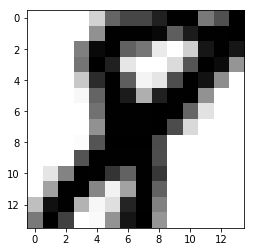

In [51]:
plt.imshow(tensor_slice[7], cmap= plt.cm.binary)
plt.show()

**":"** is equivalent to selecting the entire axis. It can also be used to crop images

The first axis (axis 0) in all data tensors is ***sample axis***. Deep Learning models dont train the data at once, 
it does it in batches.
While consiedring ***batch tensor***, the first axis is called ***batch axis*** or ***batch dimension***

In [53]:
batch= train_images[:128]
batch.shape

(128, 28, 28)

In [54]:
batch= train_images[128:256]
batch.shape

(128, 28, 28)

For nth batch

```batch= train_images[128*n:128*(n+1)]
batch.shape```

### Real world examples of data tensors:
 - **Vector Data:** 2D tensors of shape *(sample, features)*
> e.g. - An actuarial dataset of people, where we consider each person’s age, ZIP code,
and income. Each person can be characterized as a vector of 3 values, and thus
an entire dataset of 100,000 people can be stored in a 2D tensor of shape
(100000, 3).
 - **Time Series Data/ Sequence Data:** 3D tensors of shape *(samples, timesteps, features)*
 ![capture](https://user-images.githubusercontent.com/13174586/49436810-0e553400-f7e0-11e8-8b9a-586f23360a3c.JPG)
> e.g. - A dataset of stock prices. Every minute, we store the current price of the stock,
the highest price in the past minute, and the lowest price in the past minute.
Thus every minute is encoded as a 3D vector, an entire day of trading is
encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading
day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250,
390, 3). Here, each sample would be one day’s worth of data 
 - **Images:** 4D tensors of shape *(sample, height, width, channel)/(sample, channel, height, width)*
 ![capture](https://user-images.githubusercontent.com/13174586/49436988-83c10480-f7e0-11e8-841a-e132f026f541.JPG)
> Images typically have three dimensions: height, width, and color depth. Although
grayscale images (like our MNIST digits) have only a single color channel and could
thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional
color channel for grayscale images. A batch of 128 grayscale images of
size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a
batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3)
 - **Video:** 4D tensors of shape *(sample, frames, height, width, channel)/(sample, frames, channel, height, width)*
> Video data is one of the few types of real-world data for which you’ll need 5D tensors.
A video can be understood as a sequence of frames, each frame being a color image.
Because each frame can be stored in a 3D tensor (height, width, color_depth), a
sequence of frames can be stored in a 4D tensor (frames, height, width, color_
depth), and thus a batch of different videos can be stored in a 5D tensor of shape
(samples, frames, height, width, color_depth).
<br/>
e.g.- For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per
second would have 240 frames. A batch of four such video clips would be stored in a
tensor of shape (4, 240, 144, 256, 3).

### Tensor Operations

```keras.layers.Dense(512, activation='relu')
op= relu(dot(W,ip)+b)```

where W is a 2D tensor and b is a vector

### Element-wise operator

```def naive_relu(x):
    assert len(x.shape)==2
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]= max(x[i,j],0)
    return x```

```def naive_add(x,y):
    assert len(x.shape)==2    
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x```

Same above operations using ***Numpy***

```import numpy as np
z=z+y
z= np.maximum(x,0)```

### Broadcasting

When the addition of two tensors of different shapes, we use ***broadcasting***

When possible and if there’s no ambiguity, the smaller tensor will be broadcasted to match the shape of the larger tensor. <br/>Broadcasting consists of two steps:
 - Axes (called *broadcast axes*) are added to the smaller tensor to match the ndim of the larger tensor.
 - The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [59]:
train_labels.shape

(60000,)

In [60]:
train_lab= train_labels.reshape(1,60000)

In [61]:
train_lab.shape

(1, 60000)

In [69]:
print(train_lab[0][5])

2


In [71]:
type(train_lab)

numpy.ndarray

In [76]:
train_lab= np.append(train_lab,train_lab, axis=0)

In [77]:
train_lab.shape

(2, 60000)

In [82]:
train_lab

array([[5, 0, 4, ..., 5, 6, 8],
       [5, 0, 4, ..., 5, 6, 8]], dtype=uint8)

In [84]:
len(train_lab.shape

2

In [85]:
def naive_relu(x):
    assert len(x.shape)==2
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]= max(x[i,j],0)
    return x

In [86]:
def naive_add(x,y):
    assert len(x.shape)==2    
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x

In [89]:
ab= naive_add(train_lab, train_lab)
ac= naive_relu(ab)

In [90]:
ac

array([[10,  0,  8, ..., 10, 12, 16],
       [10,  0,  8, ..., 10, 12, 16]], dtype=uint8)

With broadcasting, we can generally apply two-tensor element-wise operations if one
tensor has shape ***(a, b, … n, n + 1, … m)*** and the other has shape ***(n, n + 1, … m)***. The
broadcasting will then automatically happen for axes a through ***n - 1***.

In [110]:
a= np.random.random((3,2,3,2))
b= np.random.random((2,3,2))
c= np.maximum(a,b)

In [112]:
print(a)
print(a.ndim)
print(a.shape)
print(b)
print(c)
print(c.ndim)
print(c.shape)

[[[[0.97714992 0.97490223]
   [0.09981567 0.1246505 ]
   [0.00620382 0.68450016]]

  [[0.77242125 0.1054652 ]
   [0.29980982 0.96122253]
   [0.81511276 0.80715693]]]


 [[[0.21208335 0.68096456]
   [0.28275271 0.30352589]
   [0.16752363 0.20076329]]

  [[0.82312877 0.32818145]
   [0.05544286 0.15156637]
   [0.56891153 0.71820486]]]


 [[[0.80103848 0.8048053 ]
   [0.61495057 0.36180157]
   [0.89546584 0.81025779]]

  [[0.57518859 0.24818846]
   [0.03835998 0.76346252]
   [0.37944881 0.93651953]]]]
4
(3, 2, 3, 2)
[[[0.70872432 0.20195569]
  [0.0428356  0.23570297]
  [0.29597288 0.04376766]]

 [[0.5069044  0.76808839]
  [0.00967405 0.38740428]
  [0.65596643 0.56966011]]]
[[[[0.97714992 0.97490223]
   [0.09981567 0.23570297]
   [0.29597288 0.68450016]]

  [[0.77242125 0.76808839]
   [0.29980982 0.96122253]
   [0.81511276 0.80715693]]]


 [[[0.70872432 0.68096456]
   [0.28275271 0.30352589]
   [0.29597288 0.20076329]]

  [[0.82312877 0.76808839]
   [0.05544286 0.38740428]
   [0.65596643 0.

### Tensor Dot
The dot operation, also called a ***tensor product*** (not to be confused with an elementwise
product) is the most common, most useful tensor operation. Contrary to
element-wise operations, it combines entries in the input tensors.
 An element-wise product is done with the * operator in Numpy, Keras, Theano,
and TensorFlow. dot uses a different syntax in TensorFlow, but in both Numpy and
Keras it’s done using the standard dot operator

![capture1](https://user-images.githubusercontent.com/13174586/49464343-a4a94a00-f820-11e8-9464-d5fece84ed84.JPG)


In [128]:
o= np.random.random((3,3))
p= np.random.random((3,2))
q= np.dot(o,p)

In [129]:
print(o)
print(p)
print(q)

[[0.9746623  0.94866803 0.55324458]
 [0.39040379 0.11327864 0.98007907]
 [0.07665248 0.79152354 0.24759697]]
[[0.64264033 0.16917083]
 [0.79446666 0.41918494]
 [0.38422403 0.89978331]]
[[1.59261227 1.06035202]
 [0.71745525 0.99538843]
 [0.77323175 0.56754574]]


In [132]:
print(o.shape[1])
print(p.shape[0])


3
3


In [175]:
a= np.array([[0,3,5],
            [5,5,2]])
b= np.array([[3,4,1],
            [3,-2,2],
            [4,-2,4]])
print(len(a.shape))
print(len(b.shape))

2
2


In [176]:
a.shape[1]==b.shape[0]

True

In [177]:
np.dot(a,b)

array([[ 29, -16,  26],
       [ 38,   6,  23]])

In [210]:
def dot_prod(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==2
    assert x.shape[1]==y.shape[0]
    z= np.zeros((3,3))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i,j]+= x[i,j]*y[i,j] 
    return z

In [211]:
len(a.shape)

2

In [212]:
len(b.shape)

2

In [213]:
dot_prod(a,b)

array([[  0.,  12.,   5.],
       [ 15., -10.,   4.],
       [  0.,   0.,   0.]])

In [214]:
np.zeros(a.shape[0])

array([0., 0.])

### Tensor Reshaping
Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial
tensor

In [215]:
x= np.array([[0,1],
            [2,3],
            [4,5]])

In [217]:
print(x)
print(x.reshape(2,3))
print(x.reshape(1,6))
print(x.reshape(6,1))

[[0 1]
 [2 3]
 [4 5]]
[[0 1 2]
 [3 4 5]]
[[0 1 2 3 4 5]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


A special case of reshaping that’s commonly encountered is transposition. Transposing a
matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]

In [220]:
x= np.zeros((20,200))
print(x.shape)
y= np.transpose(x)
print(y.shape)

(20, 200)
(200, 20)


### Geometric Interpretation of Tensors Operations
Because the contents of the tensors manipulated by tensor operations can be interpreted
as coordinates of points in some geometric space, all tensor operations have a
geometric interpretation. For instance, let’s consider addition. We’ll start with the following
vector:
```A = [0.5, 1]```
It’s a point in a 2D space. It’s common to picture a vector as an arrow
linking the origin to the point
![capture](https://user-images.githubusercontent.com/13174586/49464807-f7cfcc80-f821-11e8-882c-49927c1a4547.JPG)
![capture1](https://user-images.githubusercontent.com/13174586/49464805-f7373600-f821-11e8-8f94-7873856ad97b.JPG)

Let’s consider a new point, ```B = [1, 0.25]```, which we’ll add to the previous one. This is
done geometrically by chaining together the vector arrows, with the resulting location
being the vector representing the sum of the previous two vectors
![capture](https://user-images.githubusercontent.com/13174586/49464922-3a91a480-f822-11e8-9be4-9f6d3b881d2a.JPG)

### Geometric Interpretation of Deep Learning
Neural networks consist entirely of chains of tensor operations and
that all of these tensor operations are just geometric transformations of the input data.
It follows that you can interpret a neural network as a very complex geometric transformation
in a high-dimensional space, implemented via a long series of simple steps.

In 3D, the following mental image may prove useful. Imagine two sheets of colored
paper: one red and one blue. Put one on top of the other. Now crumple them
together into a small ball. That crumpled paper ball is your input data, and each sheet
of paper is a class of data in a classification problem. What a neural network (or any
other machine-learning model) is meant to do is figure out a transformation of the
paper ball that would uncrumple it, so as to make the two classes cleanly separable
again. With deep learning, this would be implemented as a series of simple transformations
of the 3D space, such as those you could apply on the paper ball with your fingers,
one movement at a time.

Uncrumpling paper balls is what machine learning is about: finding neat representations
for complex, highly folded data manifolds. Deep Learning takes the approach of
incrementally decomposing a complicated geometric transformation into a long
chain of elementary ones, which is pretty much the strategy a human would follow to
uncrumple a paper ball. Each layer in a deep network applies a transformation that
disentangles the data a little—and a deep stack of layers makes tractable an extremely
complicated disentanglement process. 

### Gradient Based Optimization

Each neural layer transforms the data as follows:

```output= relu(dot(W,input)+b)```

Here, ```W``` is ***Weight/Kernel*** and ```b``` is ***bias***. Both are ***trainable parameters*** of the layers. At first, ```W``` is filled with random values using ***random Initialization***, then with *training* using the feedback signal, ```W``` is adjusted. 

Steps of ***Training Loop***: 

 - Batch of training sample ```x``` and corresponding training target ```y``` are selected
 - Run the model using ***forward pass*** on ```x``` for get ```y_pred```
 - Compute the loss of the network ```y-y_pred```
 - Update the weights of the model and keep retarining to reduce **loss**
 
### Derivative

Let us consider a smooth function ```f(x)=y```. Since the function is *continuous*, a small change in ```x (delta_x)```, will result in a small change in ```y (delta_y)```.

```f(x + delta_x) = y + delta_y```

![capture](https://user-images.githubusercontent.com/13174586/49468444-e7701f80-f82a-11e8-8974-e0e2acd9cfbe.JPG)

Since the function is *smooth*, at cetrain point *p*, the ```delta_x``` is so small, that the function ```f(x)``` becomes linear with a slope of ```a```. Thus,

```f(x + delta_x) = y + a*delta_y```

The slope ```a``` is called the ***derivative*** of ```f``` in *p*. 

If ```a``` is ***negative*** , ```delta_x``` at point *p*  will decrease ```f(x)```. 

If ```a``` is ***positive*** , ```delta_x``` at point *p*  will increase ```f(x)```. 

The ***absolute value/ magnitude*** of ```a``` will depict how quickly the value  ```f(x)``` will increase or decrease.

e.g.-

```f(x)= a*cos(x)```<br/>
```f'(x)= -a*sin(x)```

### Gradient (Derivative) of Tensor Operation
A *gradient* is the *derivative* of Tensor Operation. 


**Input Vector:** x<br/>
**Weight:** W<br/>
**Target:** y<br/>
**Loss Function:** loss<br/>

`y_pred= dot(W,x)
loss_value= loss(y, y_pred)
`
<br/>

Let’s say the current value of ```W``` is ```W0```. Then the derivative of ```f``` in the point ```W0``` is a tensor
```gradient(f)(W0)``` with the same shape as ```W```, where each coefficient ```gradient(f)(W0)[i, j]``` indicates the direction and magnitude of the change in loss_value we observe when modifying ```W0[i, j]```. That tensor ```gradient(f)(W0)``` is the gradient of the function ```f(W) = loss_value``` in ```W0```.

The derivative of a function ```f(x)``` of a single coefficient can be
interpreted as the *slope* of the curve of ```f```. Likewise, ```gradient(f)(W0)``` can be interpreted
as the tensor describing the *curvature* of ```f(W)``` around ```W0```.

We can reduce the value of ```f(x)``` by moving ```x``` a little in the opposite direction from the derivative,
with a function ```f(W)``` of a tensor, we can reduce ```f(W)``` by moving ```W``` in the opposite
direction from the gradient: for example, ```W1 = W0 - step * gradient(f)(W0)``` (where
*step* is a *small scaling factor*). That means going against the curvature, which intuitively
should put us lower on the curve. Note that the scaling factor step is needed
because ```gradient(f)(W0)``` only approximates the curvature when we’re close to ```W0```,
so we don’t want to get too far from ```W0```. 

### Stochastic Gradient Descent

Given a differentiable function, it’s theoretically possible to find its minimum analytically:
it’s known that a function’s minimum is a point where the derivative is 0, so all
we have to do is find all the points where the derivative goes to 0 and check for which
of these points the function has the lowest value

Applied to a neural network, that means finding analytically the combination of
weight values that yields the smallest possible loss function. This can be done by solving
the equation ```gradient(f)(W) = 0``` for ```W```. This is a polynomial equation of ***N*** variables,
where N is the number of coefficients in the network. Although it would be
possible to solve such an equation for ***N = 2*** or ***N = 3***, doing so is intractable for real
neural networks, where the number of parameters is never less than a few thousand
and can often be several tens of millions

 - Draw a batch of training samples ```x``` and corresponding target values ```y```
 - Run the NN(model) on ```x``` to get ```y_pred```
 - Calculate the ```loss(y, y_pred)```on the batch
 - Using ***backward pass**, compute the gradient of the loss with regards to the network parameters
 - Move the parameters a little in the opposite directionfrom the gradient. ```W -= step*gradient``` -thus reducing the batch loss 
 
The above method is called ***Mini-Batch Stochastic Gradient Descent (mini-batch SGD)***. The term ***Stochastic*** means that each batch of the data is drawn at ***random***.

![capture](https://user-images.githubusercontent.com/13174586/49491718-57a69180-f87b-11e8-8752-0a2e36e49d78.JPG)

It is important to pick a easonable value for ***step*** factor. If is is *too small*, the the gradient descent will take too many iterations to converge and even there is a possibility that it might get stuck at the ***local minimum***. If the ***step*** size is *too large*, it might take the gradient to some random locations on the curve and our network will never converge.

There are different variants of SGD:

 - **True SGD:** Here the algorithm will draw one single sample data from ```x``` and one target data from ```y``` and perform the computations.
 - **Batch SGD:** Here the algorithm will draw all the data and run all the step on the complete data. Though it is *accurate*, computationally it is very expensive.
 - **Batch SGD:** Here the algorithm will draw random samples from the data and run all the step on the on them and repeat the process on different samples. This maintains a balance between **True SGD** and **Batch SGD**
 
In addition to the above variants, there are other variants of SGD taht look into the previous weight updates while computing the next weight update. e.g.- SGD with *momentum, Adagrad, RMSProp*. Such variants are known as ***Optimization Method*** or ***Optimizers***.

***Momentum*** addresses two issues:
 - SGD Convergence Speed
 - Local Minima

![capture](https://user-images.githubusercontent.com/13174586/49492661-334cb400-f87f-11e8-9093-415ed26466f9.JPG)

Around a certain parameter value, there is a ***local Minima***. From there, if we move to left, the loss will increase. If the ***learning rate/ step*** is small, then moving to the right will also increase the loss and the model may never converge at ***Global Minimum***. To avoid such issues, we can use ***Momentum***. 

> An real-life representation of optimization process as a small ball rolling down the loss curve. If it has enough momentum, the ball won’t get stuck in a ravine and will end up at the global minimum. Momentum is implemented by moving the ball at each step based not only on the current slope value (current acceleration) but also on the current velocity (resulting from past acceleration). In practice, this means updating the parameter ```w``` based not only on the current gradient value but also on the previous parameter update

`past_velocity = 0
 momentum = 0.1
 while loss > 0.1:
    w, loss, gradient = get_current_parameters()
    velocity= past_velocity*momentum + learning_rate*gradient
    w = w + momentum*velocity -learning_rate*gradient
    past_velocity = velocity
    update_parameter(w)`




### BackPropagation: Chaining Derivative

a neural network function consists of many tensor operations chained together, each of which has a simple,
known derivative. For instance, this is a network ```f``` composed of three tensor operations,
```a```, ```b```, and ```c```, with weight matrices ```W1```, ```W2```, and ```W3```:

```f(W1, W2, W3) = a(W1, b(W2, c(W3)))```


Calculus tells us that such a chain of functions can be derived using the following identity,
called the chain rule: 

`f(g(x)) = f'(g(x)) * g'(x)`

Applying the chain rule algorithm to compute gradient of the neural network is called ***Backpropagation*** or ***Reverse-mode Differentiation***. The backProp starts with the loss from the top layer and and works backward to the bottom layers, applying chain rule to compute contribution of each parameter in the loss value.

### MNIST Digit Classification

The input images are stored in Numpy tensors, which are here formatted as `float32` tensors of shape (60000, 784) (training data) and (10000, 784) (test data)

In [20]:
train_images= train_images.reshape((60000,28*28))
train_images= train_images.astype('float32')/255.0

test_images= test_images.reshape((10000,28*28))
test_images= test_images.astype('float32')/255.0

In [21]:
print(train_labels.shape)
train_labels= to_categorical(train_labels)
print(train_labels.shape)
test_labels= to_categorical(test_labels)

(60000,)
(60000, 10)


The network consists of a chain of two `Dense` layers, that each layer applies a few simple tensor operations to the input data, and that these operations involve weight tensors. Weight tensors, which are attributes of the layers, are where the *knowledge* of the network persists.

In [11]:
network= models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation= 'softmax'))

#### Network compilation step:
    
`categorical_crossentropy` is the *loss function* that’s used as a *feedback signal* for learning the weight tensors, and which the training phase will attempt to minimize. This reduction of the loss happens via *minibatch stochastic gradient descent*. The exact rules governing a specific use of gradient descent are defined by the *rmsprop optimizer* passed as the first argument

In [12]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

#### Traing Network loop:

when we call `fit:` the network will start to iterate on the training data in mini-batches of ***128 samples***, ***10*** times 
over (each iteration over all the training data is called an `epoch`). At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights accordingly. After these ***10 epochs***, the network will have performed ***4690 gradient updates [469 (60000/128) per epoch]***, and the loss of the network will be sufficiently low that the
network will be capable of classifying handwritten digits with high accuracy.

In [22]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.2592 - acc: 0.9249
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1034 - acc: 0.9694
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0686 - acc: 0.9798
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0501 - acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0378 - acc: 0.9888: 0s - loss: 0.0382 - acc:
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0283 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0218 - acc: 0.9937
Epoch 8/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0175 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0133 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 1s 19us/step 